In [1]:
import pandas as pd
from tqdm import trange
import matplotlib.pyplot as plt

### data exploration

In [2]:
df = pd.read_csv('data.csv')
df.head()

,PreciseTimeStamp,Region,ScaleUnit,DeploymentId,Tracepoint,ServiceHost
0,2016-08-23 10:00:00.2859270,scus,su5,9dbd1b161d5b4779a73cf19a7836ebd6,10007007,0f45edd9-1e9a-4dc1-93f2-af82ab72971e
1,2016-08-23 10:00:00.3513433,scus,su5,9dbd1b161d5b4779a73cf19a7836ebd6,10007006,a1559462-dfa9-4e8b-8925-9299fe8a88ab
2,2016-08-23 10:00:00.4547000,scus,su0,ac3ab29883ee410bba58eb2a71d5c6eb,9302,00000000-0000-0000-0000-000000000000
3,2016-08-23 10:00:00.8641492,scus,su3,90d3d2fc7ecc430c9621ece335651a01,10007006,51551ff6-2946-4f45-8451-740893ab3f68
4,2016-08-23 10:00:00.9920968,scus,su3,90d3d2fc7ecc430c9621ece335651a01,10007007,baa6ada1-289d-4715-b705-5eb30af2e599


In [3]:
df.describe()

,Tracepoint
count,5.232300e+04
mean,1.705390e+07
std,8.756265e+07
min,0.000000e+00
25%,1.002110e+06
50%,1.000701e+07
75%,1.000701e+07
max,9.088060e+08


In [4]:
df.dtypes

PreciseTimeStamp    object
Region              object
ScaleUnit           object
DeploymentId        object
Tracepoint           int64
ServiceHost         object
dtype: object

In [5]:
df['PreciseTimeStamp'] = pd.to_datetime(df['PreciseTimeStamp'])
df.dtypes

PreciseTimeStamp    datetime64[ns]
Region                      object
ScaleUnit                   object
DeploymentId                object
Tracepoint                   int64
ServiceHost                 object
dtype: object

In [6]:
df.tail()

,PreciseTimeStamp,Region,ScaleUnit,DeploymentId,Tracepoint,ServiceHost
52318,2016-08-23 15:59:57.087073800,weu,su4,be1d6d7ac9574cbc9a22cb8ee20f16fc,1002110,ae9b560d-9f02-4b11-b6c6-81bf4bee3408
52319,2016-08-23 15:59:58.212051000,scus,su3,90d3d2fc7ecc430c9621ece335651a01,10007006,afaddb84-247e-4d74-b734-702342a14232
52320,2016-08-23 15:59:58.656875900,scus,su0,ac3ab29883ee410bba58eb2a71d5c6eb,10007007,a1f285ad-b94f-468e-a767-338926036b9f
52321,2016-08-23 15:59:58.771448900,ncus,su1,e24ef436e02b4823ac5d5b1465a9401e,10007006,934bbe07-6cf2-4e66-87c9-efb5594186a0
52322,2016-08-23 15:59:59.550415400,scus,su3,90d3d2fc7ecc430c9621ece335651a01,103200,8cf38575-fca9-48ca-bd7c-21196f6d6765


### plot number of exceptions based on timestamp

In [7]:
df = df.set_index('PreciseTimeStamp')
ts = df.resample('T').count()

In [8]:
# convert index to datetime format using pd.to_datetime()
ts.index = pd.to_datetime(ts.index)

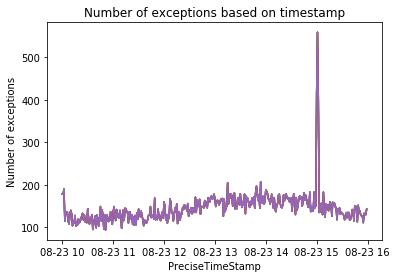

In [9]:
plt.title('Number of exceptions based on timestamp') 
plt.xlabel('PreciseTimeStamp')
plt.ylabel('Number of exceptions') 
plt.plot(ts)

### find spike - 5 minutes window

In [10]:
max_spike = 0
sum5 = 0
i = 0
for index, row in ts.iterrows():
    sum5 += row[0]
    i += 1
    if i > 4:
        if sum5 > max_spike:
            max_spike = sum5
            idx = index
        i = 0
        sum5 = 0

In [11]:
beg_spike = idx - 5
end_spike = idx
print('spike with {} exceptions - from {} to {}'.format(max_spike, beg_spike, end_spike))

spike with 1643 exceptions - from 2016-08-23 14:59:00 to 2016-08-23 15:04:00


### zoom in - 5 minutes period

In [12]:
# t_b = '2016-08-23 14:59:00'
# t_e = '2016-08-23 15:03:00'

# df_5 = df.between_time(t_b, t_e)
df_5 = df[beg_spike:end_spike]

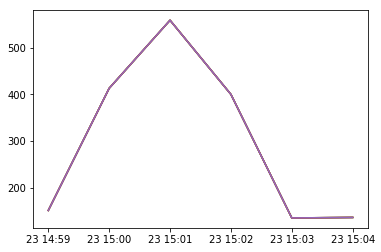

In [13]:
ts_5 = ts[beg_spike:end_spike]
plt.plot(ts_5)

In [14]:
df_5.describe()

,Tracepoint
count,1.658000e+03
mean,4.361377e+06
std,2.546829e+07
min,0.000000e+00
25%,0.000000e+00
50%,1.610800e+04
75%,1.000701e+07
max,8.313835e+08


In [15]:
df_5.tail()

,Region,ScaleUnit,DeploymentId,Tracepoint,ServiceHost
PreciseTimeStamp,,,,,
2016-08-23 15:03:57.279719700,weu,su4,be1d6d7ac9574cbc9a22cb8ee20f16fc,10007006,4bb5b724-4629-46f6-b996-3f3923df1ecf
2016-08-23 15:03:57.487986200,weu,su4,be1d6d7ac9574cbc9a22cb8ee20f16fc,10007006,78f409fe-435c-44e4-a88d-e8e78d95d745
2016-08-23 15:03:57.764645100,scus,su5,9dbd1b161d5b4779a73cf19a7836ebd6,59148,9dc34f14-1bbd-4ebb-9465-41667c0117a0
2016-08-23 15:03:58.656175700,weu,su4,be1d6d7ac9574cbc9a22cb8ee20f16fc,10007006,c11775e3-cd05-4e03-abd2-35da98ef2f0f
2016-08-23 15:03:58.927540000,weu,su4,be1d6d7ac9574cbc9a22cb8ee20f16fc,10007006,4bb5b724-4629-46f6-b996-3f3923df1ecf


### score algorithm - rank different combinations

In [16]:
# data features for research
cols = df.columns[1:5]
cols

Index(['ScaleUnit', 'DeploymentId', 'Tracepoint', 'ServiceHost'], dtype='object')

In [17]:
df = df[cols]

In [18]:
# total combinations of original & 5 min period data
tot_combs = len(df)
tot_combs_5 = len(df_5)

In [19]:
# get score for each combination - 2^len(cols) combinations
results = []
for comb in trange(1, 2**len(cols)):
    # iterate over every feature
    selected_cols = [col for i,col in enumerate(cols) if comb & (1<<i)]

    # df combinations count 
    comb_counts = pd.DataFrame(df.reset_index().groupby(selected_cols).size(), columns=['cnt'])
    # df_5 (5 min window) combinations count 
    comb_counts_5 = pd.DataFrame(df_5.reset_index().groupby(selected_cols).size(), columns=['cnt_5'])
    
    # mergre full df and df_5 - data manipulation: NaN -> 0
    combs = pd.merge(comb_counts, comb_counts_5, how='outer', on=selected_cols).fillna(0)
    
    # 2 indecators (random vars) - 1. in / out window, 2. with / without specific combination
    EXY = combs.cnt_5 / tot_combs
    # E 1.
    EX = tot_combs_5 / tot_combs
    # E 2.
    EY = combs.cnt / tot_combs
    cov = EXY - EX*EY
    p = pd.DataFrame(cov / (EX*EY)**0.5, columns=['p']).reset_index()
    
    for i in range(len(p)):
        key = tuple('*' if col not in selected_cols else p[col][i] for col in cols)
        results.append((p['p'][i].tolist(), key))

100%|██████████| 15/15 [00:08<00:00,  1.80it/s]


In [20]:
results[:10]

[(-0.022174400717134057, ('su0', '*', '*', '*')),
 (-0.04643579923795663, ('su1', '*', '*', '*')),
 (-0.02349574659964694, ('su2', '*', '*', '*')),
 (-0.038450723531531665, ('su3', '*', '*', '*')),
 (-0.05386263613642397, ('su4', '*', '*', '*')),
 (-0.026861143473736263, ('su5', '*', '*', '*')),
 (-0.00954605714522617, ('su6', '*', '*', '*')),
 (0.393004481802158, ('su7', '*', '*', '*')),
 (-0.02349574659964694, ('*', '89e2f62a73bb4efd8f545aeae40d7e51', '*', '*')),
 (-0.038450723531531665, ('*', '90d3d2fc7ecc430c9621ece335651a01', '*', '*'))]

In [21]:
# 10 combinations with the highest score
sorted(results, key = lambda x: x[0])[::-1][:10]

[(0.5139906983223299,
  ('su7',
   'b5d1d4df547d4a04ac15885617edba57',
   '*',
   'e7f60c5d-4944-42b3-922a-92e98a8e7dec')),
 (0.5139906983223299,
  ('*',
   'b5d1d4df547d4a04ac15885617edba57',
   '*',
   'e7f60c5d-4944-42b3-922a-92e98a8e7dec')),
 (0.5139906983223299,
  ('su7', '*', '*', 'e7f60c5d-4944-42b3-922a-92e98a8e7dec')),
 (0.5139906983223299, ('*', '*', '*', 'e7f60c5d-4944-42b3-922a-92e98a8e7dec')),
 (0.5072579303322549,
  ('su7',
   'b5d1d4df547d4a04ac15885617edba57',
   0,
   'e7f60c5d-4944-42b3-922a-92e98a8e7dec')),
 (0.5072579303322549,
  ('*',
   'b5d1d4df547d4a04ac15885617edba57',
   0,
   'e7f60c5d-4944-42b3-922a-92e98a8e7dec')),
 (0.5072579303322549, ('su7', '*', 0, 'e7f60c5d-4944-42b3-922a-92e98a8e7dec')),
 (0.5072579303322549, ('*', '*', 0, 'e7f60c5d-4944-42b3-922a-92e98a8e7dec')),
 (0.49825929271065733,
  ('su7',
   'b5d1d4df547d4a04ac15885617edba57',
   16108,
   'e7f60c5d-4944-42b3-922a-92e98a8e7dec')),
 (0.49825929271065733,
  ('*',
   'b5d1d4df547d4a04ac15885617ed

### playground

In [22]:
p.head()

,ScaleUnit,DeploymentId,Tracepoint,ServiceHost,p
0,su0,ac3ab29883ee410bba58eb2a71d5c6eb,0,00000000-0000-0000-0000-000000000000,-0.001556
1,su0,ac3ab29883ee410bba58eb2a71d5c6eb,0,0efb4611-d565-4cd1-9a64-7d6cb6d7d5f0,-0.002461
2,su0,ac3ab29883ee410bba58eb2a71d5c6eb,0,637e8e19-c554-44f8-9fc2-fdb215dfb464,-0.008228
3,su0,ac3ab29883ee410bba58eb2a71d5c6eb,9302,00000000-0000-0000-0000-000000000000,-0.002912
4,su0,ac3ab29883ee410bba58eb2a71d5c6eb,16100,0efb4611-d565-4cd1-9a64-7d6cb6d7d5f0,-0.001101


In [23]:
for row in p.items():
    print(row)

('ScaleUnit', 0        su0
1        su0
2        su0
3        su0
4        su0
5        su0
6        su0
7        su0
8        su0
9        su0
10       su0
11       su0
12       su0
13       su0
14       su0
15       su0
16       su0
17       su0
18       su0
19       su0
20       su0
21       su0
22       su0
23       su0
24       su0
25       su0
26       su0
27       su0
28       su0
29       su0
        ... 
17821    su7
17822    su7
17823    su7
17824    su7
17825    su7
17826    su7
17827    su7
17828    su7
17829    su7
17830    su7
17831    su7
17832    su7
17833    su7
17834    su7
17835    su7
17836    su7
17837    su7
17838    su7
17839    su7
17840    su7
17841    su7
17842    su7
17843    su7
17844    su7
17845    su7
17846    su7
17847    su7
17848    su7
17849    su7
17850    su7
Name: ScaleUnit, Length: 17851, dtype: object)
('DeploymentId', 0        ac3ab29883ee410bba58eb2a71d5c6eb
1        ac3ab29883ee410bba58eb2a71d5c6eb
2        ac3ab29883ee410bba58eb2a71d5c6eb
3  

In [24]:
combs

cnt  \
ScaleUnit DeploymentId                     Tracepoint ServiceHost                                 
su0       ac3ab29883ee410bba58eb2a71d5c6eb 0          00000000-0000-0000-0000-000000000000    4   
                                                      0efb4611-d565-4cd1-9a64-7d6cb6d7d5f0   10   
                                                      637e8e19-c554-44f8-9fc2-fdb215dfb464  169   
                                           9302       00000000-0000-0000-0000-000000000000   14   
                                           16100      0efb4611-d565-4cd1-9a64-7d6cb6d7d5f0    2   
                                           36109      0efb4611-d565-4cd1-9a64-7d6cb6d7d5f0   56   
                                                      637e8e19-c554-44f8-9fc2-fdb215dfb464    2   
                                           57581      637e8e19-c554-44f8-9fc2-fdb215dfb464   16   
                                           60002      0efb4611-d565-4cd1-9a64-7d6cb6d7d5f0    8   
                                           64018      0efb4611-d565-4cd1-9a64-7d6cb6d7d5f0  649   
                                                      7ea050cc-6d2e-459b-b243-cfff2229d720    1   
                                           64038      0efb4611-d565-4cd1-9a64-7d6cb6d7d5f0    1   
                                           65088      0efb4611-d565-4cd1-9a64-7d6cb6d7d5f0    2   
                                           68040      00000000-0000-0000-0000-000000000000   14   
                                           100005     00000000-0000-0000-0000-000000000000    3   
                                           103200     0efb4611-d565-4cd1-9a64-7d6cb6d7d5f0   86   
                                                      637e8e19-c554-44f8-9fc2-fdb215dfb464    2   
                                                      6cb12e9f-c433-4ae5-9c34-553955d1a530    1   
                                           512005     00000000-0000-0000-0000-000000000000   25   
                                           520010     0efb4611-d565-4cd1-9a64-7d6cb6d7d5f0   19   
                                           900558     0efb4611-d565-4cd1-9a64-7d6cb6d7d5f0    1   
                                           906008     0efb4611-d565-4cd1-9a64-7d6cb6d7d5f0   33   
                                           910601     e34167cc-27d9-4f32-aa55-229a5a323527    4   
                                           1002110    0efb4611-d565-4cd1-9a64-7d6cb6d7d5f0   40   
                                                      a1f285ad-b94f-468e-a767-338926036b9f    1   
                                           1005608    637e8e19-c554-44f8-9fc2-fdb215dfb464    1   
                                           1010500    0efb4611-d565-4cd1-9a64-7d6cb6d7d5f0    2   
                                           1015125    0efb4611-d565-4cd1-9a64-7d6cb6d7d5f0   11   
                                           1045706    637e8e19-c554-44f8-9fc2-fdb215dfb464    2   
                                           1045707    637e8e19-c554-44f8-9fc2-fdb215dfb464    2   
...                                                                                         ...   
su7       b5d1d4df547d4a04ac15885617edba57 10007007   60f49a44-c295-4403-84f9-040cda5c489d    1   
                                                      75856ed1-7922-4082-9ec9-e7e203f27cb3    1   
                                                      903d1071-4db3-4080-9832-1f53f6bdd916    1   
                                                      90aa881b-7c49-456b-8ea5-160eb0bcebde    1   
                                                      91b40268-8651-4de1-bc4c-5f8afdd91bdb    1   
                                                      a4b6f7c8-08b1-4cf3-b8d3-e5ee7d147b52    1   
                                                      b36dbb66-4fcd-454a-8c7a-cb1d49ee23a5    1   
                                                      b421fab3-1d8d-410e-87e2-e495ee55021e    1   
                                 